# Obtendo o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!wget https://www.dropbox.com/s/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip?dl=0
!unzip -qq -n cassava-leaf-disease-classification.zip?dl=0

--2020-12-21 02:12:46--  https://www.dropbox.com/s/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip [following]
--2020-12-21 02:12:46--  https://www.dropbox.com/s/raw/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6cdbd6ea44d0fdd3b313aab330.dl.dropboxusercontent.com/cd/0/inline/BFdBZ9IbPx46OdmVbL738nn4hhVyz5kgy3acdg96Xu6Afi6P70lvXZnYu_k4nKxLi98oCzVW-qzrbtwBmibWZ9pYx5-kev699BNqDgXjJhszue1U6uuJd67HabBdKruGOIs/file# [following]
--2020-12-21 02:12:46--  https://uc6cdbd6ea44d0fdd3b313aab330.dl.dropboxusercontent.com/cd/0/inline/BFdBZ9IbPx46OdmVbL738nn4h

In [ ]:
import pandas as pd

df_train = pd.read_csv("train.csv")
df_train.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


# Instalando fastai

In [ ]:
! [ -e /content ] && pip install -Uqq fastai

In [ ]:
from fastai.vision.all import *

# Carregando o dataset e redimensionando

In [ ]:
dls = ImageDataLoaders.from_df(df_train, path="./train_images/", item_tfms=Resize(224))

# Treinando um modelo

In [ ]:
learn = cnn_learner(dls, densenet121, metrics=[error_rate,accuracy], pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.026109,0.713033,0.243515,0.756485,04:31


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.676371,0.611199,0.200280,0.799720,04:34
1,0.568341,0.571213,0.193737,0.806263,04:34
2,0.467480,0.542297,0.181818,0.818182,04:34
3,0.400125,0.530051,0.176910,0.823089,04:34
4,0.258296,0.674903,0.193503,0.806497,04:34
5,0.165537,0.698622,0.174573,0.825427,04:34
6,0.085580,0.814871,0.187193,0.812807,04:35
7,0.053171,0.820286,0.172237,0.827763,04:35
8,0.033278,0.837585,0.170367,0.829633,04:35
9,0.029573,0.855646,0.170834,0.829166,04:34


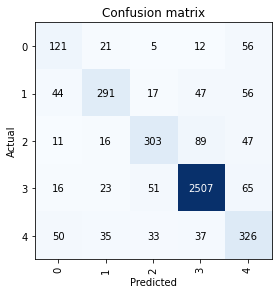

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# Aqui gravamos o modelo treinado no Google Drive, com o nome "meuModelo", para poder importar no Kaggle e fazer uma submissão
# https://www.kaggle.com/ricardoaraujo/cassava-submission-template

nome_do_modelo = 'densenet121_tune_10'
path = F"/content/gdrive/MyDrive/modelos/{nome_do_modelo}" 
learn.save(path)

Path('/content/gdrive/MyDrive/modelos/densenet121_tune_10.pth')